In [1]:
#importing the libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime

In [2]:
import time
import pandas_datareader as dr
import nsepy as nse
from datetime import date

In [3]:
print("Nothing")

Nothing


In [4]:
dataset = pd.read_csv("datasets/NIFTY 50.csv",index_col="Date",parse_dates=True)

In [5]:
dataset.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [5]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Volume        True
Turnover      True
P/E          False
P/B          False
Div Yield    False
dtype: bool

<AxesSubplot:xlabel='Date'>

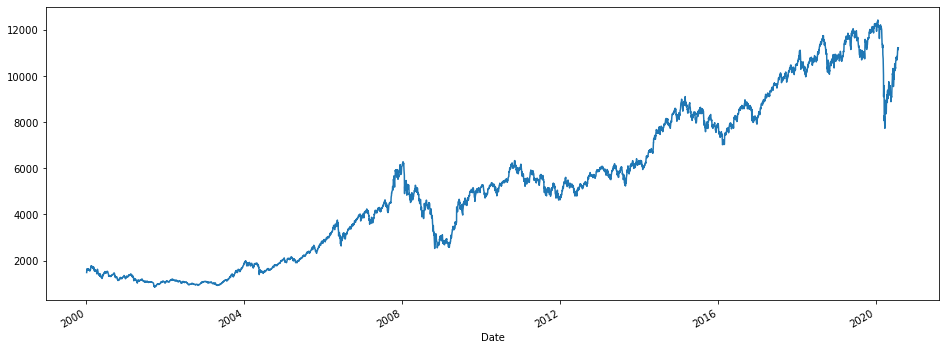

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5116 entries, 2000-01-03 to 2020-07-27
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5116 non-null   float64
 1   High       5116 non-null   float64
 2   Low        5116 non-null   float64
 3   Close      5116 non-null   float64
 4   Volume     5115 non-null   float64
 5   Turnover   5115 non-null   float64
 6   P/E        5116 non-null   float64
 7   P/B        5116 non-null   float64
 8   Div Yield  5116 non-null   float64
dtypes: float64(9)
memory usage: 399.7 KB


In [8]:
dataset["Volume"] = dataset["Volume"].replace(',', '').astype(float)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5116 entries, 2000-01-03 to 2020-07-27
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5116 non-null   float64
 1   High       5116 non-null   float64
 2   Low        5116 non-null   float64
 3   Close      5116 non-null   float64
 4   Volume     5115 non-null   float64
 5   Turnover   5115 non-null   float64
 6   P/E        5116 non-null   float64
 7   P/B        5116 non-null   float64
 8   Div Yield  5116 non-null   float64
dtypes: float64(9)
memory usage: 399.7 KB


<AxesSubplot:xlabel='Date'>

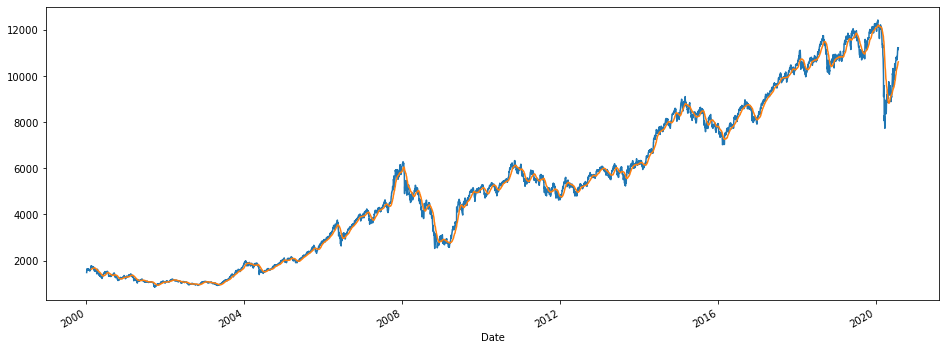

In [10]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

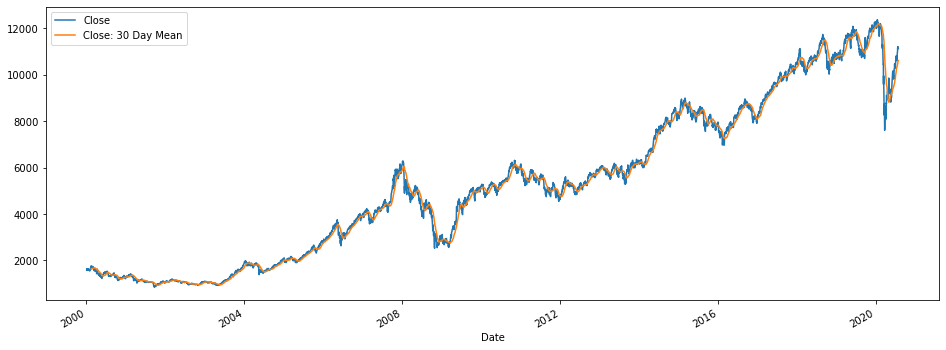

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

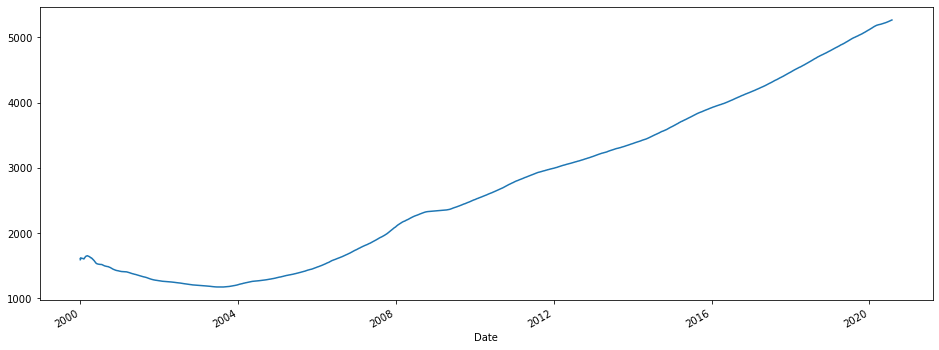

In [12]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [13]:
training_set = dataset['Open']
training_set = pd.DataFrame(training_set)

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
x_train = []
y_train = []
for i in range(60,1250):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
regressor = Sequential()

In [18]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
1190/1190 [==============================] - 9s 8ms/step - loss: 3.9729e-04
Epoch 2/100
1190/1190 [==============================] - 6s 5ms/step - loss: 6.3333e-05
Epoch 3/100
1190/1190 [==============================] - 6s 5ms/step - loss: 5.0182e-05
Epoch 4/100
1190/1190 [==============================] - 6s 5ms/step - loss: 3.7548e-05
Epoch 5/100
1190/1190 [==============================] - 7s 6ms/step - loss: 3.3749e-05
Epoch 6/100
1190/1190 [==============================] - 7s 6ms/step - loss: 3.5060e-05
Epoch 7/100
1190/1190 [==============================] - 6s 5ms/step - loss: 5.3600e-05
Epoch 8/100
1190/1190 [==============================] - 6s 5ms/step - loss: 2.9637e-05
Epoch 9/100
1190/1190 [==============================] - 6s 5ms/step - loss: 2.5230e-05
Epoch 10/100
1190/1190 [==============================] - 6s 5ms/step - loss: 2.6201e-05
Epoch 11/100
1190/1190 [==============================] - 6s 5ms/step - loss: 2.4168e-05
Epoch 12/100
1190/1190 [=====

In [20]:
data = nse.get_history('NIFTY 50',start=date(2020,4,11),end=date(2020,11,4),index=True)
dataset_test = data
dataset_test = dataset_test.head(20)
print(dataset_test)

               Open     High      Low    Close     Volume      Turnover
Date                                                                   
2020-04-13  9103.95  9112.05  8912.40  8993.85  644468815  2.674906e+11
2020-04-15  9196.40  9261.20  8874.10  8925.30  880159358  4.187864e+11
2020-04-16  8851.25  9053.75  8821.90  8992.80  720116479  3.131829e+11
2020-04-17  9323.45  9324.00  9091.35  9266.75  684910520  3.333473e+11
2020-04-20  9390.20  9390.85  9230.80  9261.85  726364699  2.862091e+11
2020-04-21  9016.95  9044.40  8909.40  8981.45  655122903  2.827389e+11
2020-04-22  9026.75  9209.75  8946.25  9187.30  734383388  3.398182e+11
2020-04-23  9232.35  9343.60  9170.15  9313.90  666650462  3.027055e+11
2020-04-24  9163.90  9296.90  9141.30  9154.40  659439249  3.285905e+11
2020-04-27  9259.70  9377.10  9250.35  9282.30  512793298  2.669654e+11
2020-04-28  9389.80  9404.40  9260.00  9380.90  614548983  3.009141e+11
2020-04-29  9408.60  9599.85  9392.35  9553.35  653026950  3.167

In [21]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [22]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2020-04-13 to 2020-05-12
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      20 non-null     float64
 1   High      20 non-null     float64
 2   Low       20 non-null     float64
 3   Close     20 non-null     float64
 4   Volume    20 non-null     int64  
 5   Turnover  20 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1+ KB


In [24]:
dataset_test['Volume'] = dataset_test["Volume"].replace(',','').astype(float)

In [25]:
test_set = dataset_test['Open']
test_set = pd.DataFrame(test_set)

In [26]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2020-04-13 to 2020-05-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [27]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pdstock = regressor.predict(X_test)
pdstock = sc.inverse_transform(pdstock)

<class 'pandas.core.series.Series'>


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (60, 1)

In [30]:
regressor.save("NiftyModel.h5")

In [28]:
pdstock = pd.DataFrame(pdstock)
pdstock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [50]:

acc = regressor.evaluate()
print("model accuracy: {:5.2f}%".format(100*acc))

AttributeError: 'int' object has no attribute 'ndim'

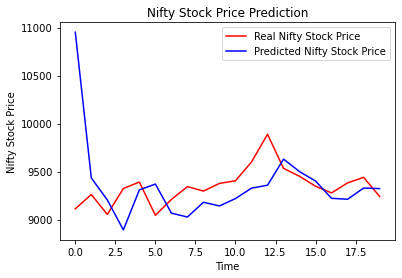

In [54]:
plt.plot(real_stock_price,color='red',label='Real Nifty Stock Price')
plt.plot(pdstock,color='blue',label='Predicted Nifty Stock Price')
plt.title("Nifty Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Nifty Stock Price')
plt.legend()
plt.show()